## Aliya Irfani
## 2109106007
## Informatika A 2021

# UNSUPERVISED LEARNING

In [1]:
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt

In [2]:
warnings.filterwarnings('ignore')

In [3]:
bm = pd.read_csv('bank-additional-full.csv',sep=";")
bm.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
bm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

## Membersihkan Data

In [5]:
from sklearn.impute import SimpleImputer

In [6]:
simpleImputerObjek = SimpleImputer(strategy = 'most_frequent')

In [7]:
bm['job'] = simpleImputerObjek.fit_transform(bm[['job']])
bm['education'] = simpleImputerObjek.fit_transform(bm[['education']])
bm.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

## Subset & Data Scaling

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
bm_subset = bm[['cons.price.idx', 'cons.conf.idx']]

In [10]:
ss = StandardScaler()

In [11]:
x_scaled = ss.fit_transform(bm_subset)

In [12]:
bm['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

## Algoritma K Means

In [13]:
from sklearn.cluster import KMeans

In [24]:
model_kmeans = KMeans(n_clusters = 3)

In [25]:
model_kmeans.fit(x_scaled)

KMeans(n_clusters=3)

In [26]:
tags = model_kmeans.labels_

In [27]:
print(tags)

[0 0 0 ... 0 0 0]


## Cross Tab

In [28]:
bm_kmeans = pd.DataFrame({'tags': tags, 'education': bm.education})

In [29]:
crosstab1 = pd.crosstab(bm_kmeans['tags'], bm_kmeans['education'])

In [30]:
print(crosstab1)

education  basic.4y  basic.6y  basic.9y  high.school  illiterate  \
tags                                                               
0              2415      1366      3438         5041           7   
1              1052       745      2141         3168           6   
2               709       181       466         1306           5   

education  professional.course  university.degree  unknown  
tags                                                        
0                         2392               4804     1046  
1                         1506               3891      366  
2                         1345               3473      319  


## Menampilkan Centroid

In [31]:
plt.style.use('ggplot')

In [32]:
xs = x_scaled[:, 0]
ys = x_scaled[:, 1]

In [33]:
centroids = model_kmeans.cluster_centers_

In [34]:
centroids_x =centroids[:,0]
centroids_y =centroids[:,1]

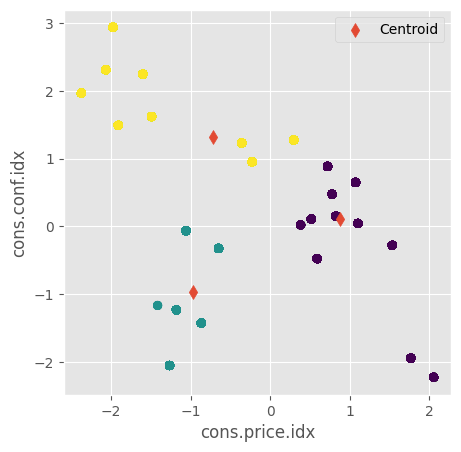

In [36]:
# Visualisasi cluster
plt.figure(figsize=(5,5))
#untuk titik data x, y dan cluster
plt.scatter(xs, ys, alpha = 0.5,  c = tags)

#titik2 centroid
plt.scatter(centroids_x, centroids_y, label ='Centroid', marker='d', s=50)

#beri label
plt.xlabel('cons.price.idx')
plt.ylabel('cons.conf.idx')

plt.legend()
plt.show()

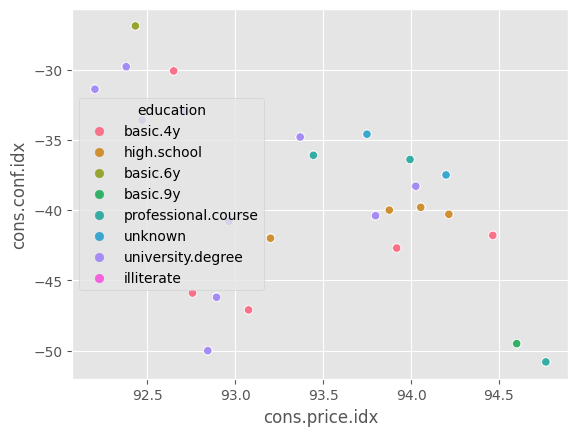

In [37]:
bm_aktual = bm[['cons.price.idx', 'cons.conf.idx', 'education']]
sns.scatterplot( x = 'cons.price.idx', y= 'cons.conf.idx', data = bm_aktual, hue ='education')
plt.show()

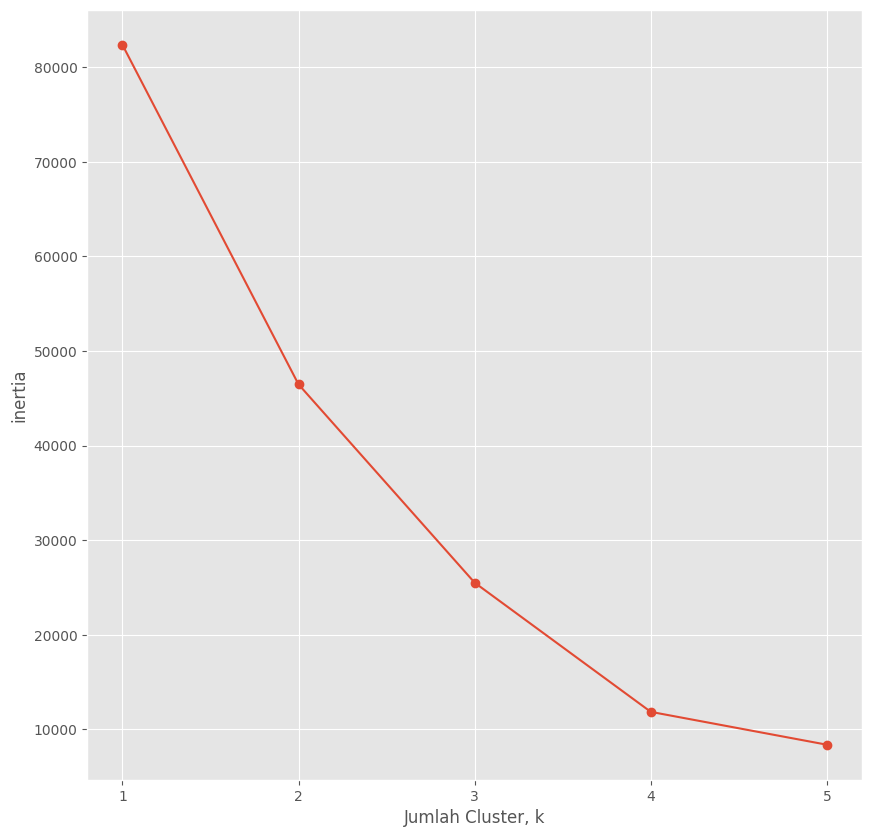

In [38]:
#menemtukan jumlah cluster
ks = range(1, 6)
inertias = []
for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(x_scaled)
    inertias.append(model.inertia_)
# Plot ks vs inertias
plt.figure(figsize=(10,10))
plt.plot(ks, inertias, '-o')
plt.xlabel('Jumlah Cluster, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

## Visualisasi

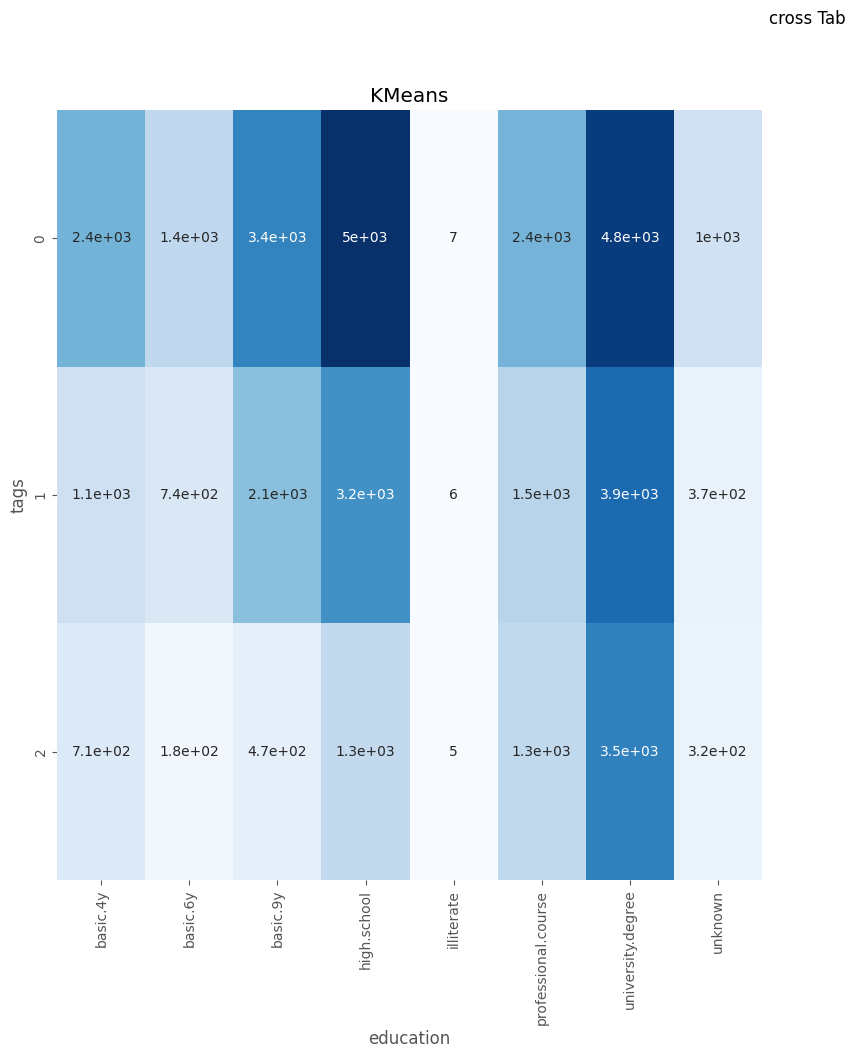

In [40]:
plt.figure(figsize=(20,10))
plt.suptitle("cross Tab")
plt.subplot(1,2,1)
plt.title("KMeans")
sns.heatmap(crosstab1, annot = True, cbar=False, cmap="Blues")
plt.show()